# Clustering the Iris data set
Applying _k_-means clustering to the classic Iris data set. 

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #The k-means algorithm

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


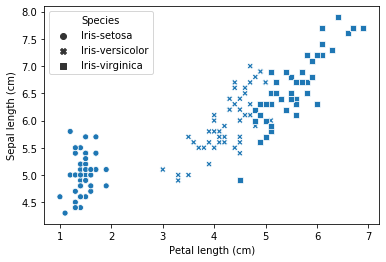

In [4]:
sns.scatterplot(x='PetalLengthCm', y='SepalLengthCm', style='Species', data=df)
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.show()

The Setosa species forms a natural cluster. The Versicolor and Virginica species do not form a natural cluster. If we knew the border (supervised learning) we would be able to separate them. A clustering algorithm however (unsupervised learning), will probably not recreate the original groups. This example shows the difference between supervised and unsupervised learning.

In [12]:
km = KMeans(n_clusters=3) #create a new k-means model with 3 clusters
X = df[['PetalLengthCm','SepalLengthCm']] #get the X variables from the dataframe
km = km.fit(X) #calculate the cluster centers
df['cluster'] = km.predict(X) #predict the clusters of each observation and store in the dataframe
df.head()
#df['cluster'].value_counts()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


We have succesfully assigned clusters to each observation. Let's plot the data.

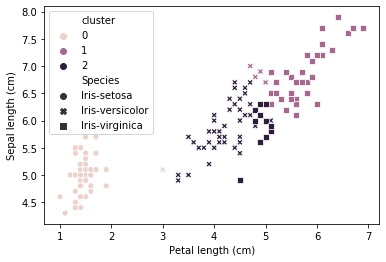

In [13]:
sns.scatterplot(x='PetalLengthCm', y='SepalLengthCm', style='Species', hue='cluster', data=df)
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.show()

As expected, there are some observations that are assigned to the 'wrong' cluster. However, remember that this is not necessarily a bad thing. We use clustering in _unsupervised_ learning, to discover clusters in data. There are often no clear 'wrong' or 'right' answers. If we forget for a moment that we know there are three species, it seems like _two_ clusters might be a more useful division: a blob on the left and one on the right. Let's try it out with 2 clusters and with 5, just to see what would happen. I'm leaving out the species in the plot, because it doesn't really matter.

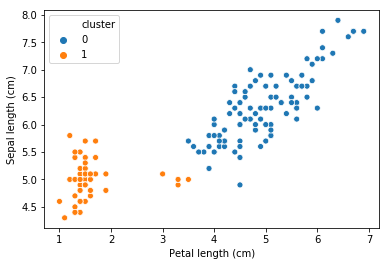

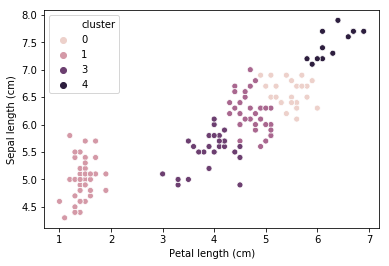

In [63]:
size = [2,5]
for n in size:
    km = KMeans(n_clusters=n) #create a new k-means model with 3 clusters
    km = km.fit(X) #calculate the cluster centers
    df['cluster'] = km.predict(X) #predict the clusters of each observation and store in the dataframe
    sns.scatterplot(x='PetalLengthCm', y='SepalLengthCm', hue='cluster', data=df)
    plt.xlabel('Petal length (cm)')
    plt.ylabel('Sepal length (cm)')
    plt.show()
 


With 2 clusters the algorithm performs reasonably well, although some points in the right cluster are placed in the 'wrong' cluster. With 5 clusters, the algorithm breaks up the cluster on the right in 4 chunks, which does not make a lot of sense as judged by the naked eye. So, it's important to choose a number of clusters that results in useful divisions. This is often quite hard and somewhat arbitary.